# I. Lý thuyết

1) Tại sao các mô hình deep learning lại chiếm ưu thế hơn so với các mô hình machine learning truyền thống đối với dữ liệu lớn ?

A. Do mô hình deep learning có thể được thiết kế với kích thước tùy ý nên có khả năng xấp xỉ mọi hàm số. Do đó nó có khả năng biểu diễn tốt và hoạt động hiệu quả trên dữ liệu lớn.

B. Các mô hình machine learning thường bị overfitting đối với dữ liệu lớn ?

C. Các mô hình deep learning có chi phí huấn luyện tốn kém hơn so với machine learning.

D. Do kiến trúc của mô hình Machine Learning bao gồm nhiều layers xếp chồng.

Chọn A. 

2) Ý nghĩa của hàm loss function trong mạng neural network là gì ?

A. Là hàm số đánh giá độ chính xác của mô hình.

B. Mục tiêu của quá trình huấn luyện là tối thiểu hóa hàm loss function bằng thuật toán gradient descent. Giá trị của hàm số này giúp đo lường mức độ khớp của dự báo từ mô hình trên dữ liệu huấn luyện.

C. Khi loss function giảm thì luôn đảm bảo độ chính xác của mô hình tăng.

D. Là hàm số cần tối đa hóa trong quá trình huấn luyện.

Chọn B

3) Khi huấn luyện trên các bộ dữ liệu bigdata thì chúng ta nên sử dụng phương pháp nào ?

A) Sử dụng gradient descent trên toàn bộ dữ liệu.

B) Sử dụng stochastic gradient descent trên từng điểm dữ liệu.

C) Mini-batch gradient descent huấn luyện mô hình trên từng tập dữ liệu con có kích thước nhỏ hơn memory CPU/GPU.

D) Có thể sử dụng stochastic gradient descent hoặc mini-batch gradient descent.

Chọn C

4) Quá trình feed forward và backpropagation thực hiện những gì ?

A) feed forward tính toán output và loss function, backpropagation tính đạo hàm trên từng layer và cập nhật trọng số.

B) feed forward cập nhật trọng số cho mô hình, backpropagation tính toán output và loss function.

C) feed forward tính ra output của mô hình, backpropagation tính toán loss function

D) feed forward được thực hiện sau backpropagation.

Chọn A

5) Tác dụng của batch normalization là gì ?

A) Loại bỏ một tỷ lệ ngẫu nhiên số lượng units tại mỗi layer để tạo thành nhiều kiến trúc kết hợp ngẫu nhiên.

B) Tìm ra các tham số phân phối là trung bình và phương sai trên từng mini-batch.

C) Đồng nhất phân phối xác suất của $z^{[l]}$ trên mỗi layer $l$.

D) Giảm thiểu ảnh hưởng của input distribution shift nhằm giúp huấn luyện loss function nhanh và ổn định hơn.

Chọn C

#Câu 5 đáp án D

# II. Thực hành

Xuất phát từ mô hình tốt nhất của bạn xây dựng được đối với bài toán phân loại income classification tại bài trước. Bạn hãy thực hiện một số thử nghiệm sau:





##6) Thay đổi hàm loss function, batch size và optimizer.

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/AI/Deeplearning_course/Week 4

/content/gdrive/MyDrive/AI/Deeplearning_course/Week 4


In [ ]:
import numpy as np
import random
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
seed = 42 
seed_all(seed)

In [ ]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

In [ ]:
df_all = pd.read_csv('./train.csv')

In [ ]:
df_all.head(10)

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0
5,5,44,Private,43711,Bachelors,13,Never-married,Other-service,Not-in-family,White,M,0,0,48,US,0
6,6,27,Private,103164,11th,7,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
7,7,38,Private,172538,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,M,15024,0,50,US,1
8,8,59,Private,170104,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,M,0,1977,50,US,1
9,9,69,?,148694,HS-grad,9,Divorced,?,Not-in-family,White,F,0,0,40,US,0


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   25000 non-null  int64 
 1   age                  25000 non-null  int64 
 2   work_type            25000 non-null  object
 3   final_weight         25000 non-null  int64 
 4   education            25000 non-null  object
 5   total_education_yrs  25000 non-null  int64 
 6   marital_state        25000 non-null  object
 7   job                  25000 non-null  object
 8   status               25000 non-null  object
 9   ethnicity            25000 non-null  object
 10  sex                  25000 non-null  object
 11  capital_gain         25000 non-null  int64 
 12  capital_loss         25000 non-null  int64 
 13  hrs_per_week         25000 non-null  int64 
 14  nationality          25000 non-null  object
 15  target_income        25000 non-null  int64 
dtypes: i

In [ ]:
# normalize string
def str_normalize(s):
    # convert into lowercase and replace multiple spaces into single space
    s = str(s).strip().lower()
    s = re.sub(' +', " ", s)
    return s
# Encode category and object columns 
def process(df):        
  for col in df.columns:
      if df[col].dtype.name == "object" or df[col].dtype.name == "category":
          df[col] = df[col].apply(str_normalize).astype("category")
  return df

In [ ]:
df_all = process(df_all.copy())

In [ ]:
IDs=df_all.pop('ID')
label = df_all.pop('target_income')
df_all_one_hot = pd.get_dummies(df_all)

In [ ]:
df_all_one_hot.head(10)

,age,final_weight,total_education_yrs,capital_gain,capital_loss,hrs_per_week,work_type_?,work_type_federal-gov,work_type_local-gov,work_type_never-worked,work_type_private,work_type_self-emp-inc,work_type_self-emp-not-inc,work_type_state-gov,work_type_without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_assoc-acdm,education_assoc-voc,education_bachelors,education_doctorate,education_hs-grad,education_masters,education_preschool,education_prof-school,education_some-college,marital_state_divorced,marital_state_married-af-spouse,marital_state_married-civ-spouse,marital_state_married-spouse-absent,marital_state_never-married,marital_state_separated,marital_state_widowed,job_?,job_adm-clerical,...,nationality_canada,nationality_china,nationality_columbia,nationality_cuba,nationality_dominican-republic,nationality_ecuador,nationality_el-salvador,nationality_england,nationality_france,nationality_germany,nationality_greece,nationality_guatemala,nationality_haiti,nationality_holand-netherlands,nationality_honduras,nationality_hong,nationality_hungary,nationality_india,nationality_iran,nationality_ireland,nationality_italy,nationality_jamaica,nationality_japan,nationality_laos,nationality_mexico,nationality_nicaragua,nationality_outlying-us(guam-usvi-etc),nationality_peru,nationality_philippines,nationality_poland,nationality_portugal,nationality_puerto-rico,nationality_scotland,nationality_south,nationality_taiwan,nationality_thailand,nationality_trinadad&tobago,nationality_us,nationality_vietnam,nationality_yugoslavia
0,45,175925,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,23,113601,10,0,0,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,22,112137,10,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,27,153078,15,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18,375515,7,0,0,20,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,44,43711,13,0,0,48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,27,103164,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,38,172538,13,15024,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,59,170104,13,0,1977,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,69,148694,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
features = df_all_one_hot.columns.tolist()
len(features)

108

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_all_one_hot[features].values, # input variable
                                                    label, # output variable
                                                    test_size=0.2, # test dataset proportion
                                                    # stratify=df_all['target_income'], # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again.

In [ ]:
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

Training Set: 20000, Test Set: 5000 



In [ ]:
#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

### 6.1)Using cross entropy, batch_size = 16, optimizer = Adam, learning rate = 0.001

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

In [ ]:
# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test.values).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)

In [ ]:
test_y

tensor([1, 0, 0,  ..., 0, 1, 1])

In [ ]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 6)
        self.fc4 = nn.Linear(6, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.nn.Softmax()(self.fc4(x))
        return x

# Create a model instance from the network
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=2, bias=True)
)


In [ ]:
#train model
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [ ]:
#test_model
def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            # print("Shape of input: {}".format(data.shape))
            # print("Shape of output: {}".format(out.shape))
            # print("Out data: {}".format(out.data))
            predicted = torch.tensor(out.data[:, 1]>=0.6).float() # 16* 2 0.1 0.9 0 1 2 : 
            # print("the predicted matrix: {}".format(predicted))
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    accuracy = float(correct)/len(data_loader.dataset)
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss, accuracy

In [ ]:
# Initialize the loss and optimizer
loss_criteria = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

In [ ]:
# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []
validation_accuracy = []

# Train over 30 epochs
epochs = 30

In [ ]:
# training through epoch

for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss, accuracy = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    validation_accuracy.append(accuracy)

Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training set: Average loss: 0.432616


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


4267  :  5000
Validation set: Average loss: 0.453640, Accuracy: 4267/5000 (85%)

Epoch: 2
Training set: Average loss: 0.432745
4268  :  5000
Validation set: Average loss: 0.453522, Accuracy: 4268/5000 (85%)

Epoch: 3
Training set: Average loss: 0.432156
4262  :  5000
Validation set: Average loss: 0.453932, Accuracy: 4262/5000 (85%)

Epoch: 4
Training set: Average loss: 0.432039
4264  :  5000
Validation set: Average loss: 0.454185, Accuracy: 4264/5000 (85%)

Epoch: 5
Training set: Average loss: 0.431534
4253  :  5000
Validation set: Average loss: 0.455069, Accuracy: 4253/5000 (85%)

Epoch: 6
Training set: Average loss: 0.431521
4275  :  5000
Validation set: Average loss: 0.454312, Accuracy: 4275/5000 (86%)

Epoch: 7
Training set: Average loss: 0.431419
4264  :  5000
Validation set: Average loss: 0.454554, Accuracy: 4264/5000 (85%)

Epoch: 8
Training set: Average loss: 0.430607
4250  :  5000
Validation set: Average loss: 0.455737, Accuracy: 4250/5000 (85%)

Epoch: 9
Training set: Average

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Evaluation on test dataset
ACCURACY_SCORE:  0.8528
F1_SCORE:  0.7898
CONFUSION_MATRIX:
 [[3501  310]
 [ 426  763]] 

              precision    recall  f1-score   support

           0     0.8915    0.9187    0.9049      3811
           1     0.7111    0.6417    0.6746      1189

    accuracy                         0.8528      5000
   macro avg     0.8013    0.7802    0.7898      5000
weighted avg     0.8486    0.8528    0.8501      5000
 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


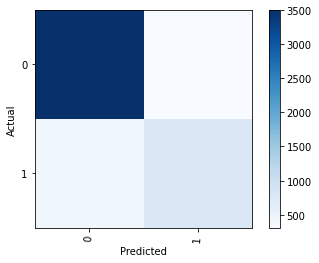

In [ ]:
def _evaluate(model, x_test):
  model.eval()

  x = torch.Tensor(x_test).float()
  _, predictions = torch.max(model(x).data, 1)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)

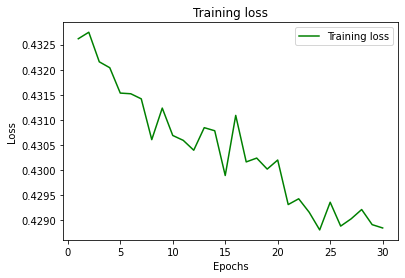

In [ ]:
plt.plot(epoch_nums, training_loss, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

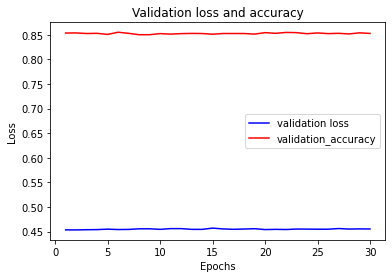

In [ ]:
plt.plot(epoch_nums, validation_loss, 'b', label='validation loss')
plt.plot(epoch_nums, validation_accuracy, 'r', label='validation_accuracy')
plt.title('Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###6.2)Using binary cross entropy, batch_size = 32, optimizer = SGD, learning rate = 0.01, 

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
# Reshape y target into [-1, 1] to fit with Binary Cross Entropy
train_y = torch.Tensor(y_train).view(-1, 1).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=32,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test.values).view(-1, 1).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=32,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [ ]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 6)
        self.fc4 = nn.Linear(6, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Create a model instance from the network
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
loss_criteria = nn.BCELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []
validation_accuracy = []

# Train over 30 epochs
epochs = 30

In [ ]:
#train model
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        # print("Shape of target: {}".format(target.shape))
        # print("Shape of out: {}".format(out.shape))
        # target_expand = torch.unsqueeze(target, 0)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [ ]:
def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            # target_expand = torch.unsqueeze(target, 0)
            # loss = loss_criteria(out, target_expand.T)
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            predicted = torch.tensor(out.data>=0.5).float()
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    accuracy = float(correct)/len(data_loader.dataset)
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss,accuracy

In [ ]:
  # training through epoch
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss, accuracy = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    validation_accuracy.append(accuracy)

Epoch: 1
Training set: Average loss: 0.439730


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


4208  :  5000
Validation set: Average loss: 0.326801, Accuracy: 4208/5000 (84%)

Epoch: 2
Training set: Average loss: 0.329868
4256  :  5000
Validation set: Average loss: 0.314860, Accuracy: 4256/5000 (85%)

Epoch: 3
Training set: Average loss: 0.321406
4266  :  5000
Validation set: Average loss: 0.311799, Accuracy: 4266/5000 (85%)

Epoch: 4
Training set: Average loss: 0.318070
4247  :  5000
Validation set: Average loss: 0.314305, Accuracy: 4247/5000 (85%)

Epoch: 5
Training set: Average loss: 0.313658
4264  :  5000
Validation set: Average loss: 0.309718, Accuracy: 4264/5000 (85%)

Epoch: 6
Training set: Average loss: 0.310725
4243  :  5000
Validation set: Average loss: 0.308033, Accuracy: 4243/5000 (85%)

Epoch: 7


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.307837
4260  :  5000
Validation set: Average loss: 0.312778, Accuracy: 4260/5000 (85%)

Epoch: 8
Training set: Average loss: 0.305801


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4280  :  5000
Validation set: Average loss: 0.308711, Accuracy: 4280/5000 (86%)

Epoch: 9
Training set: Average loss: 0.304495


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4270  :  5000
Validation set: Average loss: 0.312244, Accuracy: 4270/5000 (85%)

Epoch: 10
Training set: Average loss: 0.303495


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4288  :  5000
Validation set: Average loss: 0.312612, Accuracy: 4288/5000 (86%)

Epoch: 11


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.301104
4279  :  5000
Validation set: Average loss: 0.309087, Accuracy: 4279/5000 (86%)

Epoch: 12


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.300699
4278  :  5000
Validation set: Average loss: 0.310718, Accuracy: 4278/5000 (86%)

Epoch: 13


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.298506


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4261  :  5000
Validation set: Average loss: 0.310978, Accuracy: 4261/5000 (85%)

Epoch: 14


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.297167


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4283  :  5000
Validation set: Average loss: 0.311938, Accuracy: 4283/5000 (86%)

Epoch: 15


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.296296


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4265  :  5000
Validation set: Average loss: 0.311130, Accuracy: 4265/5000 (85%)

Epoch: 16


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.295203


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4290  :  5000
Validation set: Average loss: 0.311021, Accuracy: 4290/5000 (86%)

Epoch: 17


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.295549


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4245  :  5000
Validation set: Average loss: 0.314332, Accuracy: 4245/5000 (85%)

Epoch: 18


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.294574


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4272  :  5000
Validation set: Average loss: 0.313702, Accuracy: 4272/5000 (85%)

Epoch: 19


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.293515


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4271  :  5000
Validation set: Average loss: 0.313127, Accuracy: 4271/5000 (85%)

Epoch: 20


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.292495


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4277  :  5000
Validation set: Average loss: 0.313855, Accuracy: 4277/5000 (86%)

Epoch: 21


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.292843


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4286  :  5000
Validation set: Average loss: 0.312507, Accuracy: 4286/5000 (86%)

Epoch: 22


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.291317


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4282  :  5000
Validation set: Average loss: 0.312272, Accuracy: 4282/5000 (86%)

Epoch: 23


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.290893


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4268  :  5000
Validation set: Average loss: 0.314185, Accuracy: 4268/5000 (85%)

Epoch: 24


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.290945


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4285  :  5000
Validation set: Average loss: 0.313013, Accuracy: 4285/5000 (86%)

Epoch: 25


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.291046


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4265  :  5000
Validation set: Average loss: 0.315019, Accuracy: 4265/5000 (85%)

Epoch: 26


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.289165


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4281  :  5000
Validation set: Average loss: 0.316428, Accuracy: 4281/5000 (86%)

Epoch: 27


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.293668


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4275  :  5000
Validation set: Average loss: 0.312281, Accuracy: 4275/5000 (86%)

Epoch: 28


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.292990


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4253  :  5000
Validation set: Average loss: 0.318661, Accuracy: 4253/5000 (85%)

Epoch: 29


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.288223


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4263  :  5000
Validation set: Average loss: 0.320446, Accuracy: 4263/5000 (85%)

Epoch: 30


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Training set: Average loss: 0.288282


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd29244f5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


4292  :  5000
Validation set: Average loss: 0.319538, Accuracy: 4292/5000 (86%)



Evaluation on test dataset
ACCURACY_SCORE:  0.8584
F1_SCORE:  0.7983
CONFUSION_MATRIX:
 [[3511  300]
 [ 408  781]] 

              precision    recall  f1-score   support

           0     0.8959    0.9213    0.9084      3811
           1     0.7225    0.6569    0.6881      1189

    accuracy                         0.8584      5000
   macro avg     0.8092    0.7891    0.7983      5000
weighted avg     0.8547    0.8584    0.8560      5000
 



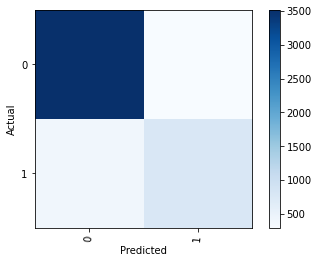

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def _evaluate(model, x_test):
  model.eval()
  x = torch.Tensor(x_test).float()
  predictions = [1 if i>0.5 else 0 for i in model(x).data]
  predictions = torch.tensor(predictions)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
_evaluate(model, x_test)

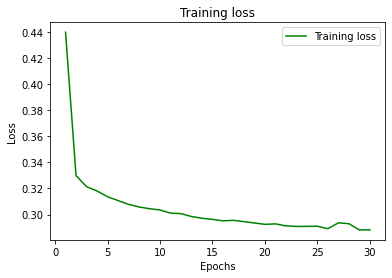

In [ ]:
plt.plot(epoch_nums, training_loss, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

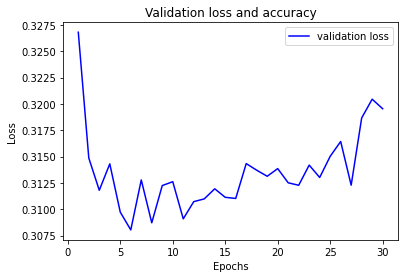

In [ ]:
plt.plot(epoch_nums, validation_loss, 'b', label='validation loss')
# plt.plot(epoch_nums, validation_accuracy, 'r', label='validation_accuracy')
plt.title('Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

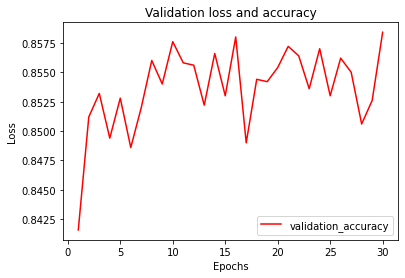

In [ ]:
# plt.plot(epoch_nums, validation_loss, 'b', label='validation loss')
plt.plot(epoch_nums, validation_accuracy, 'r', label='validation_accuracy')
plt.title('Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Nhận xét: Với trường hợp 6.2 khi tuning parameter như vậy, loss trên validation nhìn chung giảm xong lại tăng.

Có thể do cái learning rate lớn quá chăng?

##7) Thử nghiệm thêm các layers mà bạn đã học được trong bài này vào kiến trúc của mình.

I just add Batch norm and dropout to the model

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

In [ ]:
# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test.values).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)

In [ ]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.batchnorm = nn.BatchNorm1d(hl)
        self.fc3 = nn.Linear(hl, 6)
        self.dropout = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(6, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.batchnorm(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = torch.nn.Softmax()(self.fc4(x))
        return x

# Create a model instance from the network
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (batchnorm): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=6, out_features=2, bias=True)
)


In [ ]:
#train model
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [ ]:
#test_model
def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            # print("Shape of input: {}".format(data.shape))
            # print("Shape of output: {}".format(out.shape))
            # print("Out data: {}".format(out.data))
            predicted = torch.tensor(out.data[:, 1]>=0.6).float() # 16* 2 0.1 0.9 0 1 2 : 
            # print("the predicted matrix: {}".format(predicted))
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    accuracy = float(correct)/len(data_loader.dataset)
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss, accuracy

In [ ]:
# Initialize the loss and optimizer
loss_criteria = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

In [ ]:
# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []
validation_accuracy = []

# Train over 30 epochs
epochs = 30

In [ ]:
# training through epoch

for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss, accuracy = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    validation_accuracy.append(accuracy)

Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training set: Average loss: 0.496416


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


4233  :  5000
Validation set: Average loss: 0.458566, Accuracy: 4233/5000 (85%)

Epoch: 2
Training set: Average loss: 0.466361
4215  :  5000
Validation set: Average loss: 0.457429, Accuracy: 4215/5000 (84%)

Epoch: 3
Training set: Average loss: 0.461114
4217  :  5000
Validation set: Average loss: 0.457888, Accuracy: 4217/5000 (84%)

Epoch: 4
Training set: Average loss: 0.459686
4198  :  5000
Validation set: Average loss: 0.457493, Accuracy: 4198/5000 (84%)

Epoch: 5
Training set: Average loss: 0.458093
4187  :  5000
Validation set: Average loss: 0.460427, Accuracy: 4187/5000 (84%)

Epoch: 6
Training set: Average loss: 0.457272
4259  :  5000
Validation set: Average loss: 0.452862, Accuracy: 4259/5000 (85%)

Epoch: 7
Training set: Average loss: 0.456264
4239  :  5000
Validation set: Average loss: 0.452413, Accuracy: 4239/5000 (85%)

Epoch: 8
Training set: Average loss: 0.453905
4240  :  5000
Validation set: Average loss: 0.452759, Accuracy: 4240/5000 (85%)

Epoch: 9
Training set: Average

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Evaluation on test dataset
ACCURACY_SCORE:  0.8554
F1_SCORE:  0.794
CONFUSION_MATRIX:
 [[3503  308]
 [ 415  774]] 

              precision    recall  f1-score   support

           0     0.8941    0.9192    0.9065      3811
           1     0.7153    0.6510    0.6816      1189

    accuracy                         0.8554      5000
   macro avg     0.8047    0.7851    0.7940      5000
weighted avg     0.8516    0.8554    0.8530      5000
 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


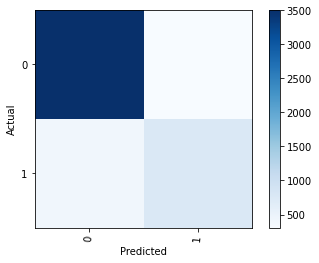

In [ ]:
def _evaluate(model, x_test):
  model.eval()

  x = torch.Tensor(x_test).float()
  _, predictions = torch.max(model(x).data, 1)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)

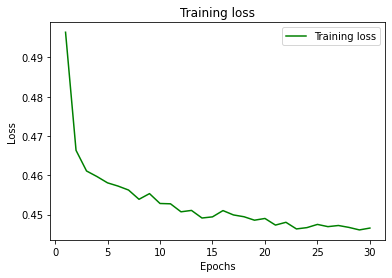

In [ ]:
plt.plot(epoch_nums, training_loss, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

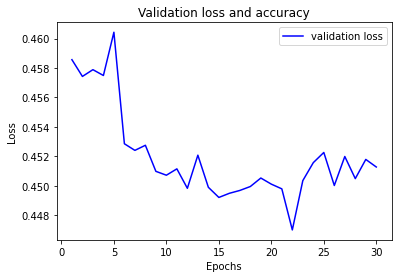

In [ ]:
plt.plot(epoch_nums, validation_loss, 'b', label='validation loss')
# plt.plot(epoch_nums, validation_accuracy, 'r', label='validation_accuracy')
plt.title('Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

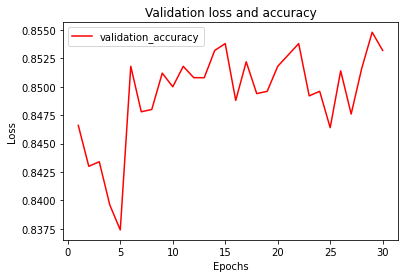

In [ ]:
# plt.plot(epoch_nums, validation_loss, 'b', label='validation loss')
plt.plot(epoch_nums, validation_accuracy, 'r', label='validation_accuracy')
plt.title('Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##8) Thay đổi các khởi tạo trọng số theo các phân phối khác nhau và đánh giá độ chính xác của kết quả huấn luyện.

In [ ]:
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

In [ ]:
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test.values).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)

In [ ]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.batchnorm = nn.BatchNorm1d(hl)
        self.fc3 = nn.Linear(hl, 6)
        self.dropout = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(6, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.batchnorm(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = torch.nn.Softmax()(self.fc4(x))
        return x

# Create a model instance from the network
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (batchnorm): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=6, out_features=2, bias=True)
)


In [ ]:
#initialize_weights
def initialize_weights(m):
  if isinstance(m, nn.BatchNorm1d):
      nn.init.constant_(m.weight.data, 1)
      nn.init.constant_(m.bias.data, 0)
  elif isinstance(m, nn.Linear):
      nn.init.xavier_uniform(m.weight.data)
      nn.init.constant_(m.bias.data, 0)

model.apply(initialize_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  import sys


Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (batchnorm): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=6, out_features=2, bias=True)
)

In [ ]:
#train model
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [ ]:
#test_model
def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            # print("Shape of input: {}".format(data.shape))
            # print("Shape of output: {}".format(out.shape))
            # print("Out data: {}".format(out.data))
            predicted = torch.tensor(out.data[:, 1]>=0.6).float() # 16* 2 0.1 0.9 0 1 2 : 
            # print("the predicted matrix: {}".format(predicted))
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    accuracy = float(correct)/len(data_loader.dataset)
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss, accuracy

In [ ]:
# Initialize the loss and optimizer
loss_criteria = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

In [ ]:
# training through epoch

for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss, accuracy = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    validation_accuracy.append(accuracy)

Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training set: Average loss: 0.508126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


4199  :  5000
Validation set: Average loss: 0.461510, Accuracy: 4199/5000 (84%)

Epoch: 2
Training set: Average loss: 0.472550
4238  :  5000
Validation set: Average loss: 0.455638, Accuracy: 4238/5000 (85%)

Epoch: 3
Training set: Average loss: 0.465834
4226  :  5000
Validation set: Average loss: 0.456337, Accuracy: 4226/5000 (85%)

Epoch: 4
Training set: Average loss: 0.462516
4243  :  5000
Validation set: Average loss: 0.454200, Accuracy: 4243/5000 (85%)

Epoch: 5
Training set: Average loss: 0.459597
4224  :  5000
Validation set: Average loss: 0.456430, Accuracy: 4224/5000 (84%)

Epoch: 6
Training set: Average loss: 0.459728
4268  :  5000
Validation set: Average loss: 0.451243, Accuracy: 4268/5000 (85%)

Epoch: 7
Training set: Average loss: 0.458899
4237  :  5000
Validation set: Average loss: 0.453533, Accuracy: 4237/5000 (85%)

Epoch: 8
Training set: Average loss: 0.458178
4267  :  5000
Validation set: Average loss: 0.450414, Accuracy: 4267/5000 (85%)

Epoch: 9
Training set: Average

Evaluation on test dataset
ACCURACY_SCORE:  0.8504
F1_SCORE:  0.7766
CONFUSION_MATRIX:
 [[3563  248]
 [ 500  689]] 

              precision    recall  f1-score   support

           0     0.8769    0.9349    0.9050      3811
           1     0.7353    0.5795    0.6482      1189

    accuracy                         0.8504      5000
   macro avg     0.8061    0.7572    0.7766      5000
weighted avg     0.8433    0.8504    0.8439      5000
 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


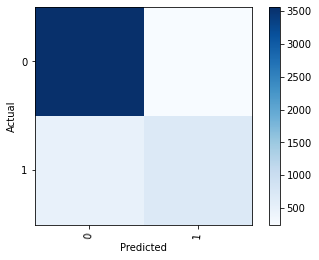

In [ ]:
def _evaluate(model, x_test):
  model.eval()

  x = torch.Tensor(x_test).float()
  _, predictions = torch.max(model(x).data, 1)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)

##9) Thiết lập không gian search và tự động hóa tìm kiếm kiến trúc tốt nhất trên optuna.

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 14.0 MB/s 
     |████████████████████████████████| 81 kB 7.8 MB/s 
     |████████████████████████████████| 210 kB 33.0 MB/s 
     |████████████████████████████████| 75 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 113 kB 32.2 MB/s 
     |████████████████████████████████| 149 kB 33.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=635154ea00a75fba6e49fb8e14e060f3b71edb91ca30ff08abd59521fd1708bf
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from optuna.trial import TrialState
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
# Reshape y target into [-1, 1] to fit with Binary Cross Entropy
train_y = torch.Tensor(y_train).view(-1, 1).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

In [ ]:
# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test.values).view(-1, 1).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [ ]:
def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 2, 6)
    layers = []

    in_features = len(features)
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, 1))
    layers.append(nn.Sigmoid())

    return nn.Sequential(*layers)

In [ ]:
DEVICE = torch.device("cpu")
BATCHSIZE = 16
EPOCHS = 30
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 300
N_VALID_EXAMPLES = BATCHSIZE * 100

In [ ]:
def objective(trial):

    # Generate the model.
    model = define_model(trial).to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    loss_criteria = nn.BCELoss()
    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            # loss = F.nll_loss(output, target)
            loss = loss_criteria(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = torch.tensor(output.data>=0.5).float()
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(test_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, timeout=600)

[I 2022-02-20 11:30:32,100] A new study created in memory with name: no-name-bb5341ac-cba8-4b28-a628-d440fdd70b93
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-20 11:31:22,556] Trial 0 finished with value: 0.853125 and parameters: {'n_layers': 3, 'n_units_l0': 36, 'dropout_l0': 0.4255055338681929, 'n_units_l1': 55, 'dropout_l1': 0.3100603731527902, 'n_units_l2': 32, 'dropout_l2': 0.4001174480044044, 'optimizer': 'Adam', 'lr': 7.111370949452309e-05}. Best is trial 0 with value: 0.853125.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-20 11:32:1

In [ ]:
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

In [ ]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Study statistics: 
  Number of finished trials:  10
  Number of pruned trials:  2
  Number of complete trials:  8
Best trial:
  Value:  0.856875
  Params: 
    n_layers: 3
    n_units_l0: 83
    dropout_l0: 0.23915938578479612
    n_units_l1: 58
    dropout_l1: 0.46255336305752653
    n_units_l2: 9
    dropout_l2: 0.2251802551917152
    optimizer: RMSprop
    lr: 0.0005326833024407146


Nhận xét: cái optuna để tối ưu architecture của model hay ghê. Cần ngâm cứu thêm nữa.

##10) Deploy model sử dụng flask ap. Tham khảo [Flaskapp tutorial](https://drive.google.com/file/d/1AZNtzrmnhJ-OBgijWoaAqXbPhJ6xL0Po/view?usp=sharing).

Cái này bó tay!